In [1]:
!pip install -q --upgrade scipy

import cv2
import tensorflow as tf
import numpy as np
import scipy

import matplotlib.pyplot as plt

print(scipy.__version__)

1.7.2


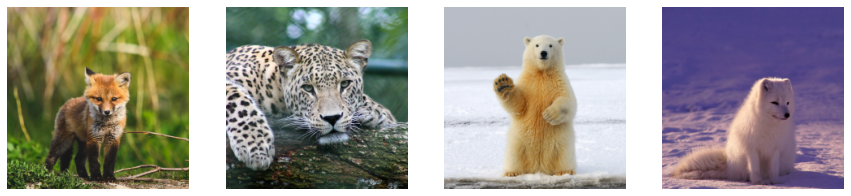

102883328/102869336 [==============================] - 1s 0us/step


In [2]:
def load_image(path, size=224):
  img = cv2.resize(cv2.imread(path)[...,::-1], (size, size))
  return img.astype(np.float32)

def show(img, **kwargs):
  img = np.array(img)
  img -= img.min(); img /= img.max()
  plt.imshow(img, **kwargs)
  plt.axis('off')

images_classes = [
                  ('assets/fox.png', 278),
                  ('assets/leopard.png', 288),
                  ('assets/polar_bear.png', 296),
                  ('assets/snow_fox.png', 279),
]

x = np.array([load_image(p) for p, y in images_classes])
y = np.array([y for p, y in images_classes])

plt.rcParams["figure.figsize"] = [15, 6]
for i in range(len(x)):
  plt.subplot(1, len(x), i+1)
  show(x[i])
plt.show()

model = tf.keras.applications.ResNet50V2()
model.layers[-1].activation = tf.keras.activations.linear
x_preprocess = tf.keras.applications.resnet_v2.preprocess_input(x.copy())


# Playing with the `grid_size` parameter

In [4]:
from sobol_attribution_method.tf_explainer import SobolAttributionMethod

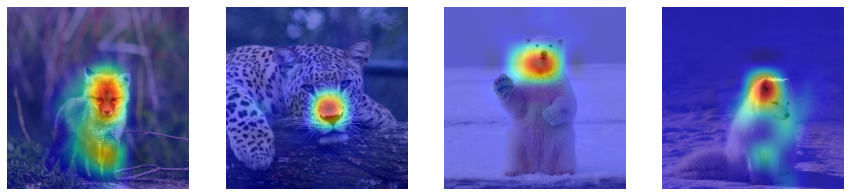

In [5]:
explainer = SobolAttributionMethod(model, grid_size=8, nb_design=32, batch_size=256)
explanations = explainer(x_preprocess, y)

for i in range(len(x)):
  plt.subplot(1, len(x), i+1)
  show(x[i])
  show(explanations[i], cmap='jet', alpha=0.5)
plt.show()

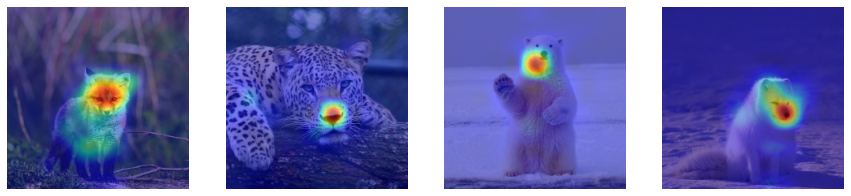

In [6]:
explainer = SobolAttributionMethod(model, grid_size=11, nb_design=32, batch_size=256)
explanations = explainer(x_preprocess, y)

for i in range(len(x)):
  plt.subplot(1, len(x), i+1)
  show(x[i])
  show(explanations[i], cmap='jet', alpha=0.5)
plt.show()

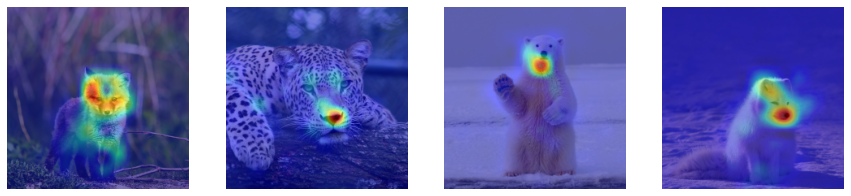

In [7]:
explainer = SobolAttributionMethod(model, grid_size=14, nb_design=32, batch_size=256)
explanations = explainer(x_preprocess, y)

for i in range(len(x)):
  plt.subplot(1, len(x), i+1)
  show(x[i])
  show(explanations[i], cmap='jet', alpha=0.5)
plt.show()